<a href="https://colab.research.google.com/github/Harishragav3354/Intelligent-Chatbot-Intent-Classifier1/blob/main/Chatbot_Intent_Classifier_Phase2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving chatbot_intents.csv to chatbot_intents.csv


In [ ]:
import pandas as pd
df = pd.read_csv('chatbot_intents.csv')
df.head()


,intent,text__001,text__002,text__003,text__004,text__005,text__006,text__007,responses__-,text__008,...,extension__responses__003,extension__responses__004,extension__responses__005,context__in,context__out,context__clear,entityType,entities__entity,entities__rangeFrom,entities__rangeTo
0,Greeting,Hi,Hi there,Hola,Hello,Hello there,Hya,Hya there,NaN,NaN,...,NaN,NaN,NaN,NaN,GreetingUserRequest,False,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,GreetingResponse,My user is Adam,This is Adam,I am Adam,It is Adam,My user is Bella,This is Bella,I am Bella,NaN,It is Bella,...,"Hello %%HUMAN%%, what can I do for you?","Hola %%HUMAN%%, how can I help you?","OK hi %%HUMAN%%, what can I do for you?",GreetingUserRequest,NaN,True,NaN,HUMAN,3.0,4.0
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,HUMAN,2.0,3.0


In [ ]:
import pandas as pd

df = pd.read_csv('chatbot_intents.csv')
text_cols = ['text__001', 'text__002', 'text__003', 'text__004',
             'text__005', 'text__006', 'text__007', 'text__008']
rows = []
for col in text_cols:
    temp = df[['intent', col]].copy()
    temp.columns = ['intent', 'text']
    rows.append(temp)

df_long = pd.concat(rows)

df_long.dropna(inplace=True)
df_long['text'] = df_long['text'].str.lower().str.strip()

df_long.reset_index(drop=True, inplace=True)
df_long.head()


,intent,text
0,Greeting,hi
1,GreetingResponse,my user is adam
2,CourtesyGreeting,how are you?
3,CourtesyGreetingResponse,good thanks! my user is adam
4,CurrentHumanQuery,what is my name?


In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df_long['label'] = le.fit_transform(df_long['intent'])
X_text = df_long['text']
y = df_long['label']


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer()
X = tfidf.fit_transform(X_text)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, stratify=y, random_state=42)


In [ ]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)


LogisticRegression(max_iter=1000)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)


RandomForestClassifier()

Logistic Regression Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         1
           1       0.50      1.00      0.67         1
           2       1.00      1.00      1.00         1
           3       0.67      1.00      0.80         2
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         1
           6       1.00      1.00      1.00         1
           7       0.33      1.00      0.50         1
           8       1.00      0.50      0.67         2
           9       1.00      1.00      1.00         1
          10       0.00      0.00      0.00         1
          11       1.00      1.00      1.00         2
          12       0.50      1.00      0.67         1
          13       0.00      0.00      0.00         2
          14       0.33      1.00      0.50         1
          15       0.67      1.00      0.80         2
          16       1.00      0.50      0.67         2

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


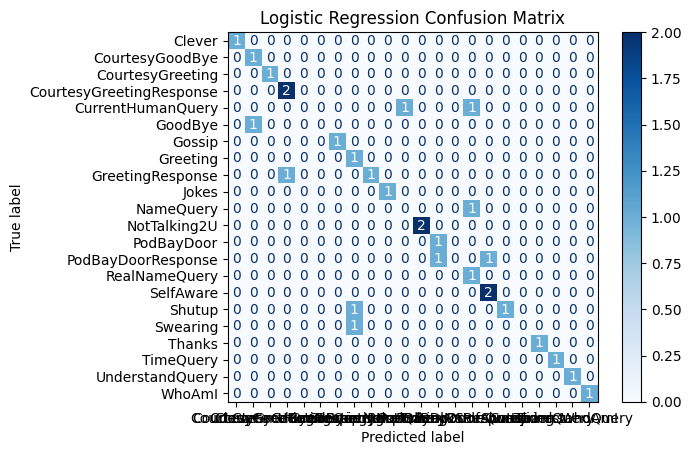

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

print("Logistic Regression Report:")
print(classification_report(y_test, lr_model.predict(X_test)))

cm_lr = confusion_matrix(y_test, lr_model.predict(X_test))
disp_lr = ConfusionMatrixDisplay(confusion_matrix=cm_lr, display_labels=le.classes_)
disp_lr.plot(cmap='Blues')
plt.title("Logistic Regression Confusion Matrix")
plt.show()


Random Forest Report:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         1
           1       0.50      1.00      0.67         1
           2       1.00      1.00      1.00         1
           3       1.00      1.00      1.00         2
           4       0.00      0.00      0.00         2
           5       0.00      0.00      0.00         1
           6       1.00      1.00      1.00         1
           7       0.25      1.00      0.40         1
           8       1.00      1.00      1.00         2
           9       0.50      1.00      0.67         1
          10       0.00      0.00      0.00         1
          11       1.00      1.00      1.00         2
          12       1.00      1.00      1.00         1
          13       1.00      0.50      0.67         2
          14       0.50      1.00      0.67         1
          15       1.00      1.00      1.00         2
          16       1.00      0.50      0.67         2
     

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


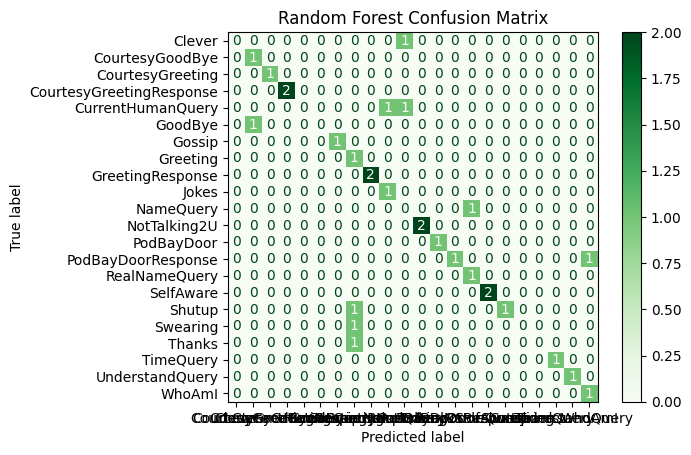

In [ ]:
print("Random Forest Report:")
print(classification_report(y_test, rf_model.predict(X_test)))

cm_rf = confusion_matrix(y_test, rf_model.predict(X_test))
disp_rf = ConfusionMatrixDisplay(confusion_matrix=cm_rf, display_labels=le.classes_)
disp_rf.plot(cmap='Greens')
plt.title("Random Forest Confusion Matrix")
plt.show()


In [3]:
pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 19.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.9/322.9 kB 16.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 6.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 107.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 5.0 MB/s eta 0:00:00


In [4]:
import gradio as gr
import pickle

# Train your best model first (we'll reuse it here)
# Below assumes you're using `rf_model` and `tfidf`

def predict_intent(user_input):
    input_vector = tfidf.transform([user_input])
    prediction = rf_model.predict(input_vector)[0]
    intent_name = le.inverse_transform([prediction])[0]
    return f"Predicted Intent: {intent_name}"

# Create the Gradio interface
interface = gr.Interface(fn=predict_intent,
                         inputs="text",
                         outputs="text",
                         title="Customer Support Chatbot",
                         description="Enter your query below to detect its intent")

interface.launch(share=True)


Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://35f06fabbb9df1dd2d.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
